In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


**Imports**

In [0]:
import cv2
import pandas as pd
import numpy as np
from keras.preprocessing import image
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
import matplotlib.gridspec as gridspec


# **1. Load Image**

In [0]:
filelist= glob.glob('/content/drive/My Drive/horse.jpeg')
img= filelist[0]


# ***2. Generating a black-and-white sketch***






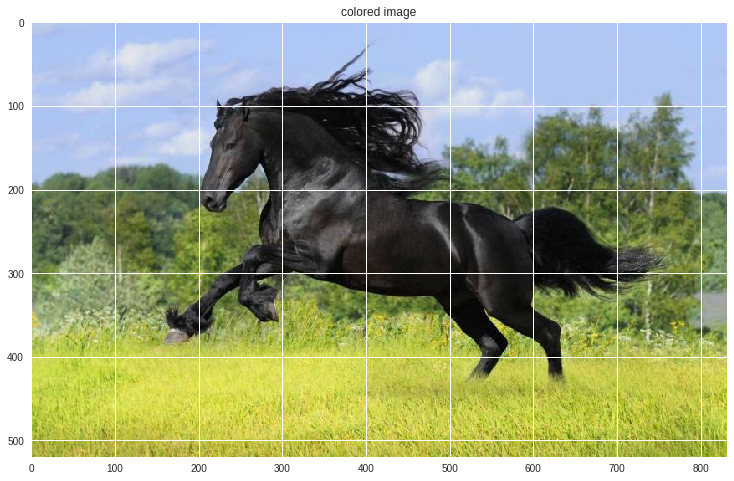

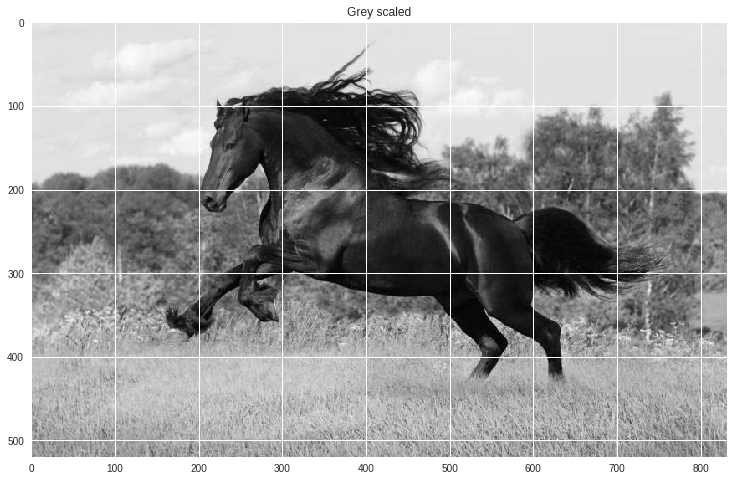

(520, 832, 3)
(520, 832)


In [25]:
image = cv2.imread(img)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2GRAY)
plt.title ('colored image')
plt.imshow(RGB_image)
plt.figure()
plt.title('Grey scaled')
plt.imshow(gray_image,  cmap='gray')
plt.show()

print(RGB_image.shape)
print(gray_image.shape)





# RGB components

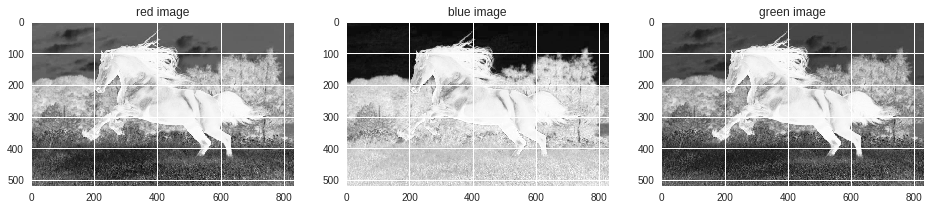

In [28]:
# get RGB components

comp= [None]*3
comp[1],comp[2],comp[0] = cv2.split(image)       # get b,g,r
titles = ['red image','blue image','green image']
plt.rcParams['figure.figsize'] = (16,8)
gs = gridspec.GridSpec(1, 3)
plt.figure()
for i in range (3):
  ax = plt.subplot(gs[0, i]) 
  plt.title (titles[i])
  plt.imshow(comp[i])


# 2.1 Noise Reduction Using Median Filter

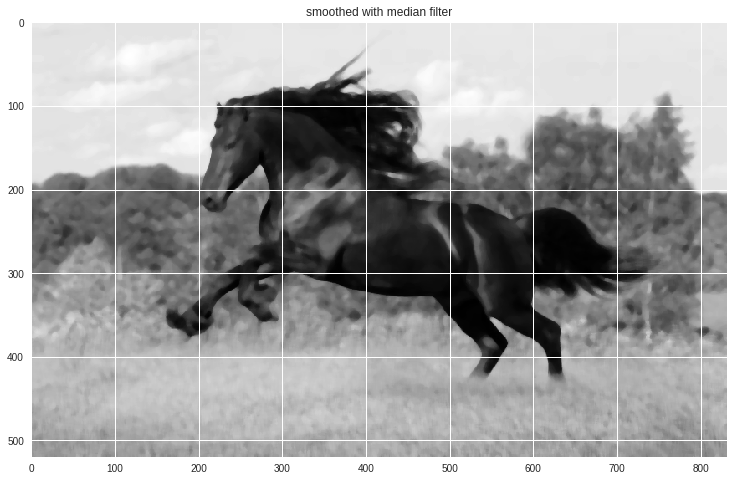

In [29]:
median = cv2.medianBlur(gray_image,7)
plt.figure()
plt.title('smoothed with median filter')
plt.imshow(median , cmap='gray')


# 2.2 Edge Detection Using Laplacian Filter / Binary threshold


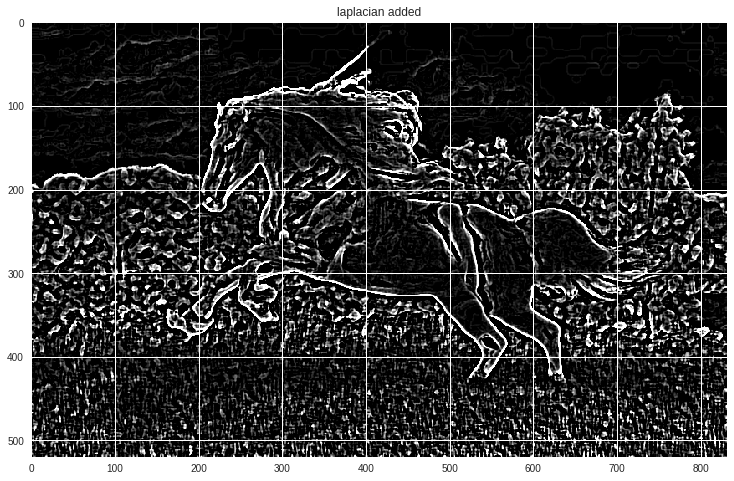

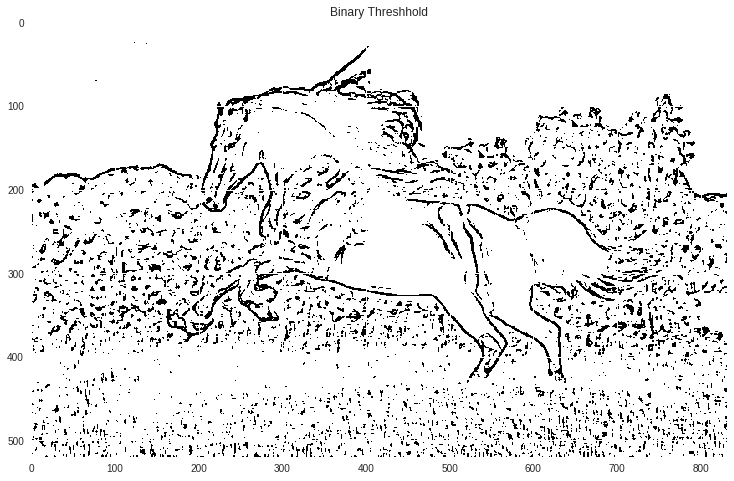

In [30]:
laplacian = cv2.Laplacian(median,ddepth=-1, ksize = 5)
ret,thresh1 = cv2.threshold(laplacian,125,255,cv2.THRESH_BINARY)
plt.figure()
plt.title('laplacian added')
plt.imshow(laplacian, cmap='gray')
plt.figure()
plt.title('Binary Threshhold')
plt.imshow(thresh1 )
plt.show()

# 3. Generating a color painting and a cartoon

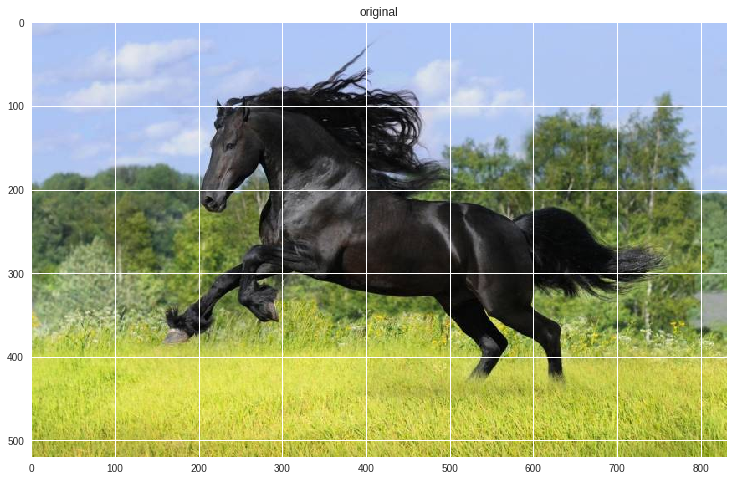

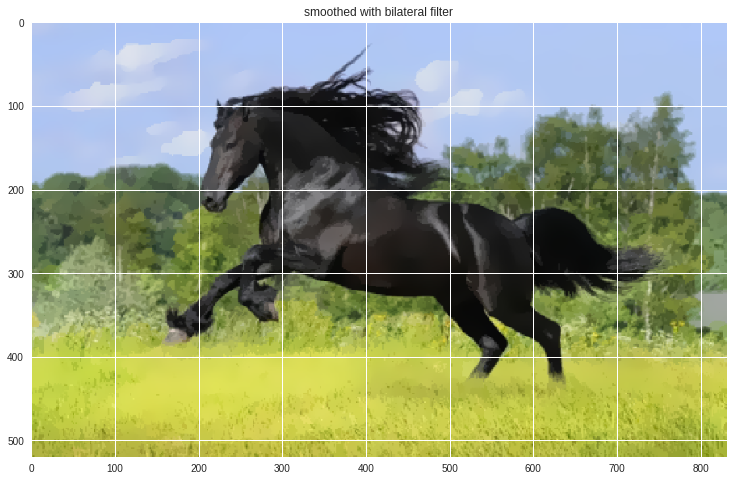

In [33]:
numBilateralFilters = 7

# 60 % dimensions
scale_percent = 60 # percent of original size
width = int(RGB_image.shape[1] * scale_percent / 100)
height = int(RGB_image.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(RGB_image, dim, interpolation = cv2.INTER_AREA)
colored_img = resized


# repeatedly apply small bilateral filter instead of applying one large filter

for _ in range(numBilateralFilters):
    colored_img = cv2.bilateralFilter(img_color, d=9,sigmaColor=9,sigmaSpace=7)
    
# resize again to original size
dim = (RGB_image.shape[1], RGB_image.shape[0])
resized = cv2.resize(colored_img, dim, interpolation = cv2.INTER_AREA)

plt.title('original')
plt.imshow(RGB_image)
plt.figure()

plt.title('smoothed with bilateral filter')
plt.imshow(resized)
plt.show()

(520, 832)
(520, 832, 3)


False

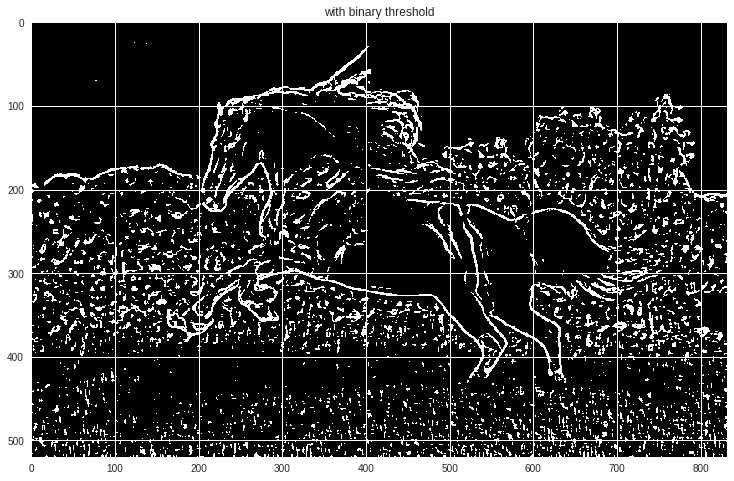

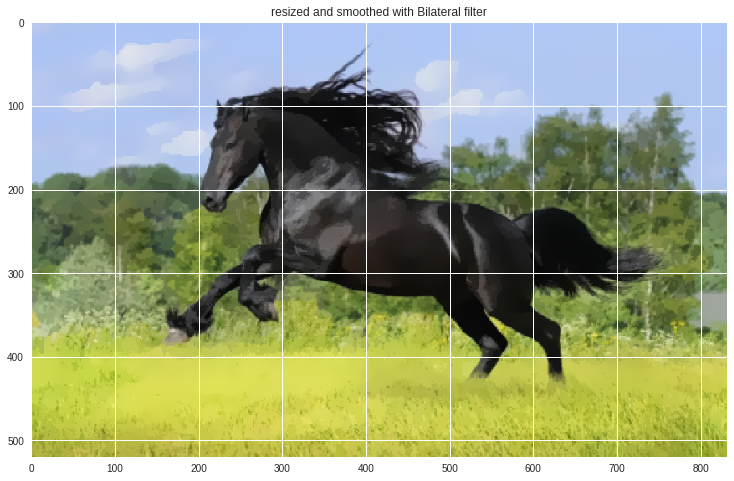

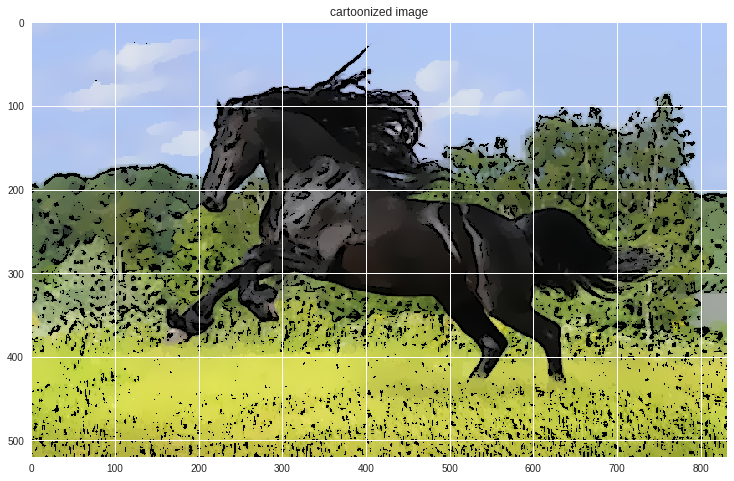

In [38]:

# convert the grayscaled image smoothed with laplacian after applying binary threshold to RGB format
img_edge = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2RGB)
cartoonized= cv2.subtract(resized,img_edge)

print(thresh1.shape)
plt.figure()
plt.title ('with binary threshold')
plt.imshow(thresh1, cmap='gray' )

print(resized.shape)
plt.figure()
plt.title ('resized and smoothed with Bilateral filter')
plt.imshow(resized, cmap='gray' )

plt.figure()
plt.title('cartoonized image')
plt.imshow(cartoonized, cmap='gray' )
cv2.imwrite('/content/drive/My Drive/Photos/cartoonized.png',cv2.cvtColor(cartoonized,cv2.COLOR_RGB2BGR))



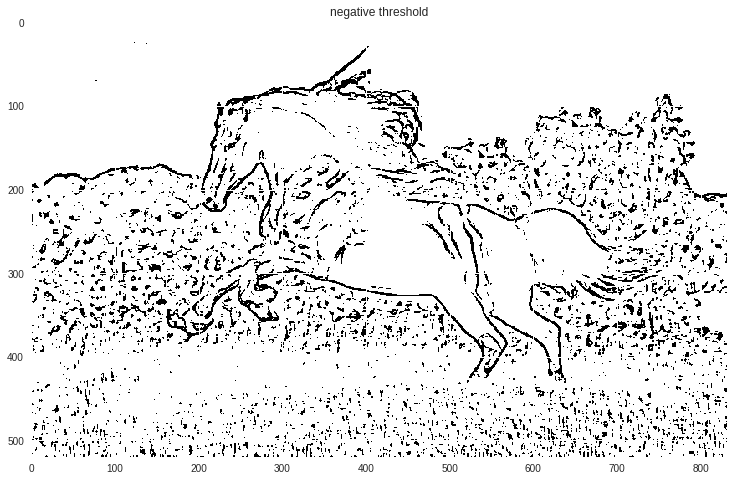

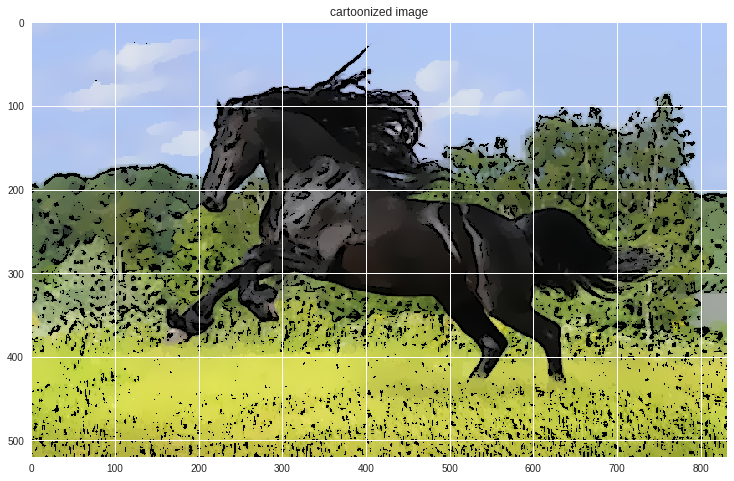

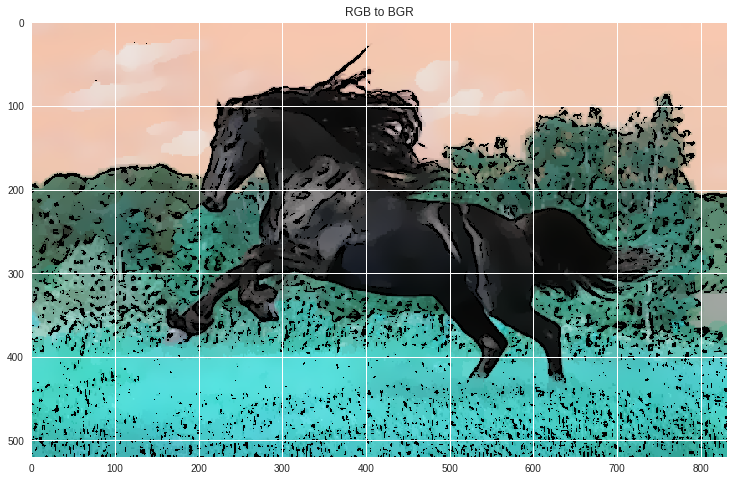

In [43]:
thresh2 = cv2.bitwise_not(thresh1)
img_edge = cv2.cvtColor(thresh2,cv2.COLOR_GRAY2RGB)
plt.figure()
plt.title ('negative threshold')
plt.imshow(img_edge)
plt.show()

cartoon = cv2.bitwise_and(resized, img_edge)
plt.figure()
plt.title('cartoonized image')
plt.imshow(cartoon)
plt.show()

cartoon_converted = cv2.cvtColor(img_cartoon,cv2.COLOR_RGB2BGR) # RGB to BGR 
plt.figure()
plt.title ('RGB to BGR')
plt.imshow(cartoon_converted)
plt.show()